In [1]:
import os,sys
import numpy as np
import cv2
from imageio.v2 import imread
from PIL import Image
import scipy
from scipy.signal import convolve2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import color
import matplotlib.pyplot as plt

In [2]:
"""
• 'L' (8-bit pixels, grayscale)
• 'P' (8-bit pixels, mapped to any other mode using a color palette)
• 'RGB' (3x8-bit pixels, true color)
• 'RGBA' (4x8-bit pixels, true color with transparency mask)
• 'CMYK' (4x8-bit pixels, color separation)
• 'YCbCr' (3x8-bit pixels, color video format)
• 'I' (32-bit signed integer pixels)
• 'F' (32-bit floating point pixels)
"""

def access():
    PathImg = "./imagens/"
    lstFilesImg = []
    for dirName, subdirList, fileList in os.walk(PathImg):
        for filename in fileList:
            lstFilesImg.append(os.path.join(dirName,filename))

    print("Lista de imagens: ")
    print(lstFilesImg)

    img=imread(lstFilesImg[0],pilmode='F')
    print("Dimensões 1ª imagem: ", img.shape)

    width=512
    height=512
    aspect_ratio = 1

    imglist=[]
    for file in lstFilesImg:
        img=imread(file,pilmode='F')
        img=np.array(Image.fromarray(img).resize((width,int(height* aspect_ratio))))
        imglist.append(img)
    Imagens = np.asarray(imglist,dtype=np.float32)
    print("Após resize: ", Imagens.shape)
    return Imagens

Imagens = access()

Lista de imagens: 
['./imagens/8.0001.jpg', './imagens/histologica.jpg', './imagens/ISIC_0013411.jpg', './imagens/pe_diabetico005.jpg']
Dimensões 1ª imagem:  (881, 1081)
Após resize:  (4, 512, 512)


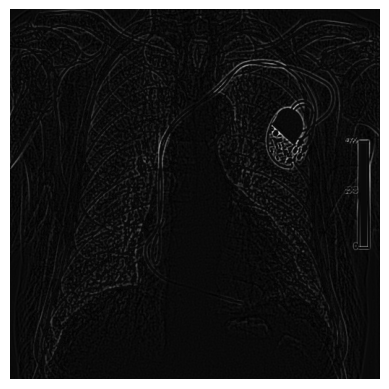

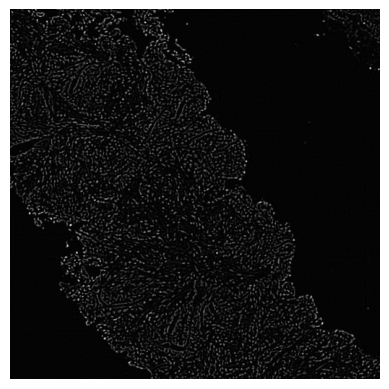

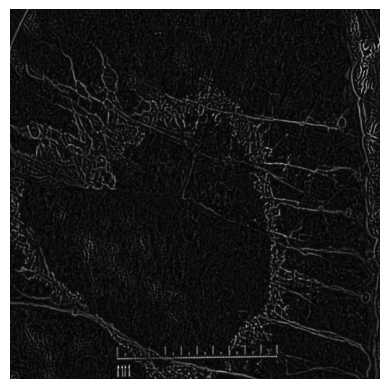

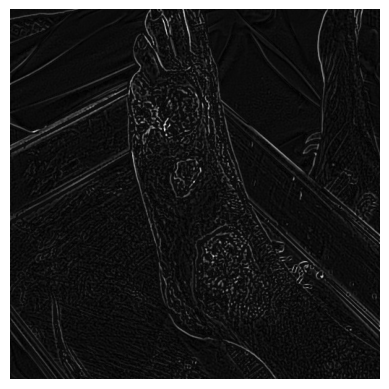

In [3]:
def DoG(Imagens):
    for x in range(len(Imagens)):
        #convoluções com o primeiro gaussino
        s = 2
        w = 5
        t = (((w - 1)/2)-0.5)/s
        temp = scipy.ndimage.gaussian_filter(Imagens[x,:,:],sigma = s,truncate = t)

        #convoluções com o segundo gaussino
        s = 2
        w = 3
        t = (((w - 1)/2)-0.5)/s
        temp2 = scipy.ndimage.gaussian_filter(Imagens[x,:,:], sigma = s,truncate = t)

        #subtração das duas imagens anteriores e soma de um threshold para retirar os pixeis com valores mais baixos
        result = temp - temp2
        result = (result > result.mean()-1)*result
        plt.axis('off')
        plt.imshow(result,cmap='gray')
        plt.show()

DoG(Imagens)

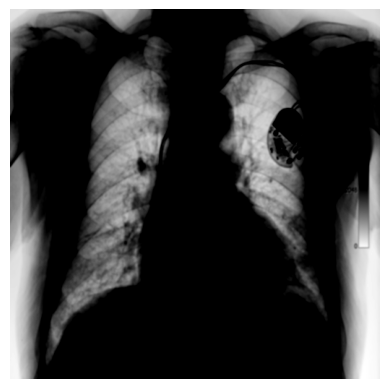

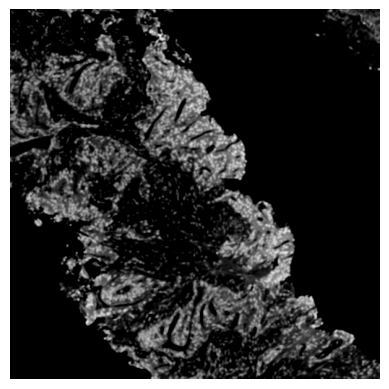

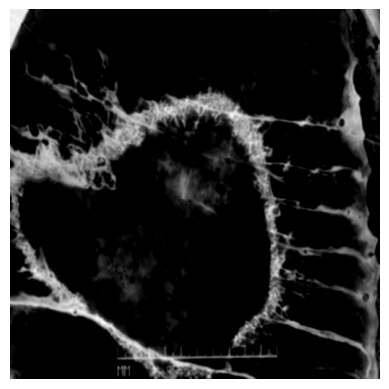

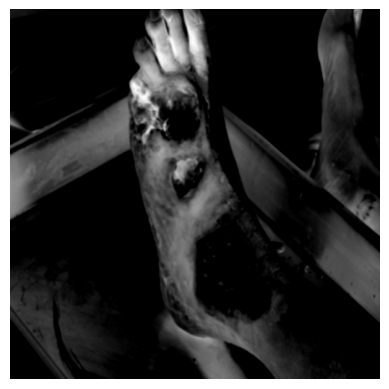

In [4]:
def DoG2(Imagens):
    for x in range(len(Imagens)):
        temp = scipy.ndimage.gaussian_filter(Imagens[x,:,:],sigma = 100) #by default, t=4.0
        temp2 = scipy.ndimage.gaussian_filter(Imagens[x,:,:], sigma = 1)
        result = temp - temp2
        result = (result > result.mean())*result
        
        plt.axis('off')
        plt.imshow(result,cmap='gray')
        plt.show()

DoG2(Imagens)

C:\Users\hugob\AppData\Local\Temp\ipykernel_5008\2473140048.py:10: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  temp = scipy.ndimage.filters.gaussian_filter(Imagens[x,:,:],sigma = s)


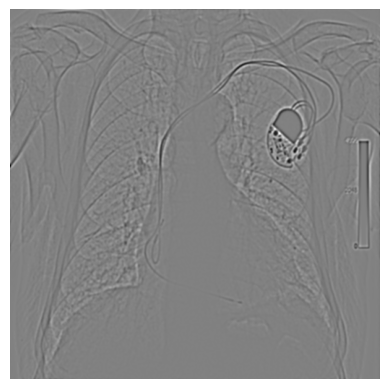

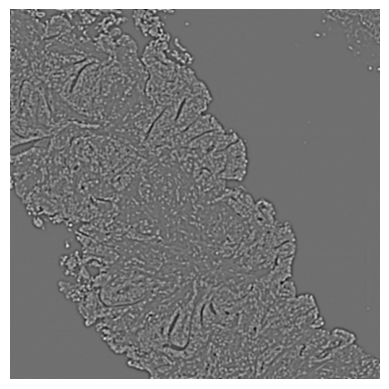

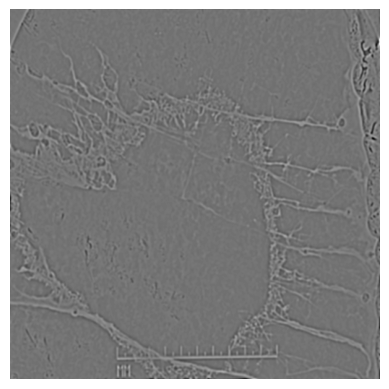

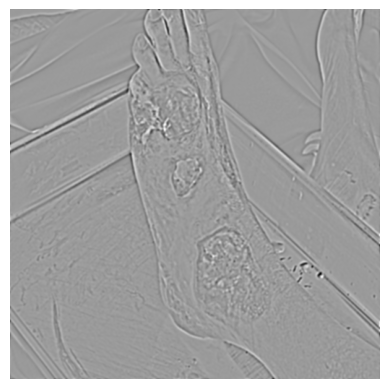

In [5]:
def LoGs(Imagens):
    lap_kernel = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
    ])
    
    for x in range(len(Imagens)):
        s = 1.5 #smooth
        temp = scipy.ndimage.filters.gaussian_filter(Imagens[x,:,:],sigma = s)
        result = cv2.filter2D(temp,-1,lap_kernel)
        
        plt.axis('off')
        plt.imshow(result,cmap='gray')
        plt.show()

LoGs(Imagens)

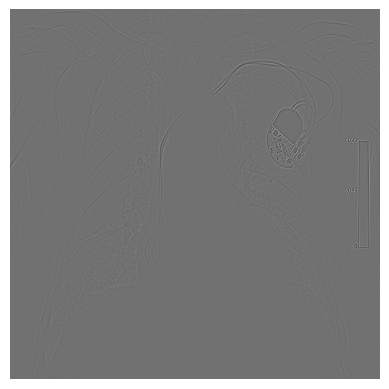

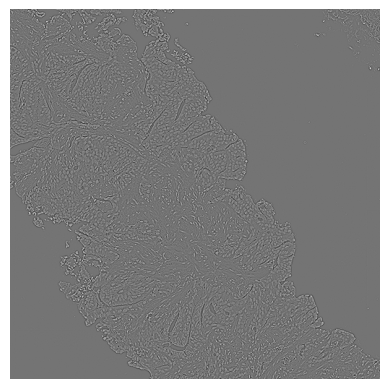

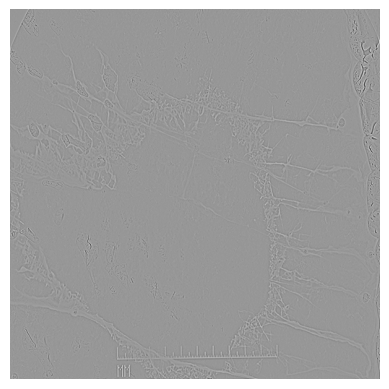

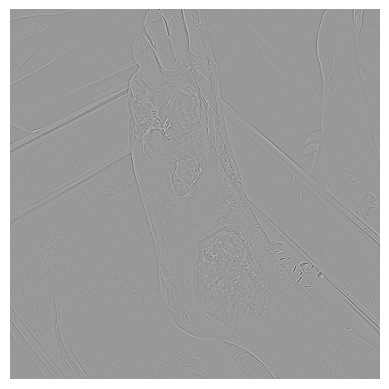

In [6]:
def LoGns(Imagens):
    lap_kernel = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
    ])
    
    for x in range(len(Imagens)):
        result = cv2.filter2D(Imagens[x,:,:],-1,lap_kernel)
        
        plt.axis('off')
        plt.imshow(result,cmap='gray')
        plt.show()

LoGns(Imagens)